### First peek into NSF grant information, year 2017 and 1997
** Original data format is XML **

In [2]:
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt 

In [3]:
def nameSearch(name, alist):
    # in mxl file, there are repeating of entries with same name, such as "FirstName"
    # adding sequential numbers for column names
    n = 2
    newname = name + '-' + str(n)
    for i in range(len(alist)):
        if newname in alist:
            n += 1
            newname = name + '-'+ str(n)
        else:
            break
    return n
        

def eachgrant(xmlfile):
    # parse xml file into 2 list, one for tags, one for text fields
    f = open(xmlfile)
    tree = ET.parse(f)
    f.close()
    root = tree.getroot()
    column = []
    value = []
    for children in root:
        for child in children:
            if len(child)==0:
                if child.tag in column:
                    n = nameSearch(child.tag, column)
                    column.append(child.tag + '-' + str(n))
                else:
                    column.append(child.tag)
                value.append(child.text)
            else:
                for kid in child:
                    if len(kid)==0:
                        tag = child.tag + '-' + kid.tag
                        if tag in column:
                            n = nameSearch(tag, column)
                            column.append(tag + '-' + str(n))
                        else:
                            column.append(tag)
                        value.append(kid.text)
                    else:
                        for grandkid in kid:
                            tag = kid.tag + '-' + grandkid.tag
                            if tag in column:
                                n = nameSearch(tag, column)
                                column.append(tag + '-' + str(n))
                            else:
                                column.append(tag)
                            value.append(grandkid.text)
    return column, value


from os import listdir
from os.path import isfile, join

# create dataframe for 2017 data
mypath = 'C:/Users/huang/Documents/dataScience/Incubator/NFS/2017'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
grant2017 = pd.DataFrame()
for f in onlyfiles:
    f = join(mypath, f)
    try:
        column, value = eachgrant(f)
        agrant = pd.DataFrame([value], columns=column)
        grant2017 = grant2017.append(agrant)
    except Exception:
        pass   
grant2017 = grant2017.reset_index(drop=True)
print(grant2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Columns: 124 entries, ARRAAmount to ProgramReference-Text-9
dtypes: object(124)
memory usage: 10.1+ MB
None


**check column names to see what's in the file**

In [4]:
print(grant2017.columns.values)

['ARRAAmount' 'AbstractNarration' 'AwardAmount' 'AwardEffectiveDate'
 'AwardExpirationDate' 'AwardID' 'AwardInstrument-Value' 'AwardTitle'
 'Directorate-LongName' 'Division-LongName' 'Institution-CityName'
 'Institution-CountryName' 'Institution-Name' 'Institution-PhoneNumber'
 'Institution-StateCode' 'Institution-StateName'
 'Institution-StreetAddress' 'Institution-ZipCode'
 'Investigator-EmailAddress' 'Investigator-EmailAddress-2'
 'Investigator-EmailAddress-3' 'Investigator-EmailAddress-4'
 'Investigator-EmailAddress-5' 'Investigator-EmailAddress-6'
 'Investigator-EmailAddress-7' 'Investigator-EmailAddress-8'
 'Investigator-EndDate' 'Investigator-EndDate-2' 'Investigator-EndDate-3'
 'Investigator-EndDate-4' 'Investigator-EndDate-5'
 'Investigator-EndDate-6' 'Investigator-EndDate-7'
 'Investigator-EndDate-8' 'Investigator-FirstName'
 'Investigator-FirstName-2' 'Investigator-FirstName-3'
 'Investigator-FirstName-4' 'Investigator-FirstName-5'
 'Investigator-FirstName-6' 'Investigator-F

**load year 1997 data:** 

In [6]:
# create dataframe for 1997 data
mypath = 'C:/Users/huang/Documents/dataScience/Incubator/NFS/1997'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
grant1997 = pd.DataFrame()
for f in onlyfiles:
    f = join(mypath, f)
    try:
        column, value = eachgrant(f)
        agrant = pd.DataFrame([value], columns=column)
        grant1997 = grant1997.append(agrant)
    except Exception:
        pass
grant1997 = grant1997.reset_index(drop=True) 

In [7]:
print(grant1997.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10205 entries, 0 to 10204
Columns: 360 entries, ARRAAmount to ProgramReference-Text-9
dtypes: object(360)
memory usage: 28.0+ MB
None


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

**Comapre the statistics of the 'AwardAmount' in these two years :**

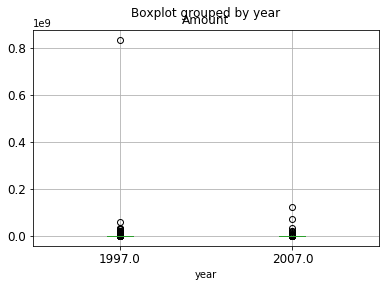

In [9]:
# for first peek, extract award amounts in this two years to compare:
combine1 = pd.DataFrame(columns = ['year', 'Amount'])
combine1['Amount'] = grant1997['AwardAmount']
combine1['year'] = 1997.0
combine1['Amount'] = pd.to_numeric(combine1['Amount'], errors='coerce')
combine1 = combine1.dropna()

combine2 = pd.DataFrame(columns = ['year', 'Amount'])
combine2['Amount'] = pd.to_numeric(grant2017['AwardAmount'], errors='coerce')
combine2['year'] = 2007.0
combine2 = combine2.dropna()
combine2 = combine2.reset_index(drop=True)

combine3 = combine1.append(combine2)
combine3 =combine3.reset_index(drop=True)
pd.to_numeric(combine1['Amount'], errors='coerce')
combine3.boxplot(column='Amount', by='year', fontsize=12)

**A "big" award in 1997! How about replot it without the "outlier"?**

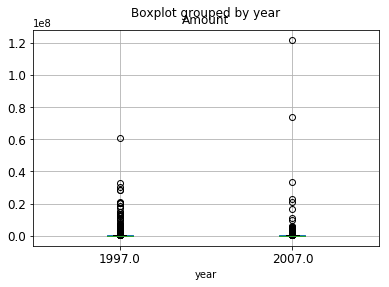

In [11]:
combine3 = combine3[combine3["Amount"] < 2e8]
combine3.boxplot(column='Amount', by='year', fontsize=12)

**Another statistic plot with Matplotlib, better controls on labels**

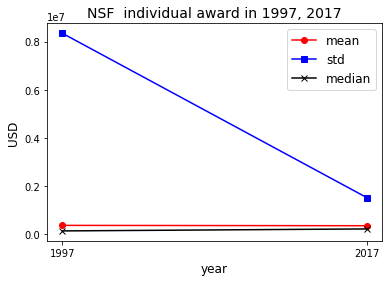

In [12]:
# matplotlib can better control text on figures:
import matplotlib.pyplot as plt 
mean1 = combine1['Amount'].mean()
mean2 = combine2['Amount'].mean()
std1 = combine1['Amount'].std()
std2 = combine2['Amount'].std()
median1 = combine1['Amount'].median()
median2 = combine2['Amount'].median()
fig, ax = plt.subplots()
ax.plot([1997, 2017], [mean1, mean2], marker='o', c='red')
ax.plot([1997, 2017], [std1, std2], marker='s', c='blue')
ax.plot([1997, 2017], [median1, median2], marker='x', c='black')
ax.legend(['mean', 'std', 'median'], fontsize='12')
plt.xlabel('year', fontsize = '12')
plt.ylabel('USD', fontsize = '12')
plt.xticks([1997, 2017])
plt.title('NSF  individual award in 1997, 2017', fontsize='14')
plt.show()